# revisit Michael's code for croco and with pands and xarray tools

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import crocosi.postp as pp

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/distributed/utils.py:137: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  RuntimeWarning,


---

## single run

In [2]:
root_path = '/home/datawork-lops-osi/aponte/bturb_itide/jet/'
#run = 'jet_cfg1_wp9_4km_0a2000j/'
run = 'jet_cfg1_wp9_4km_nodecay_2000a2300j/'

gparams = {'f0': 1.0313e-4, 'beta': 1.6186e-11}
r = pp.CROCOrun(root_path+run, prefix='file_', open_nc=['ave','inst'], grid_params=gparams)

In [3]:
r['inst']

<xarray.Dataset>
Dimensions:              (axis_nbounds: 2, s_rho_slice0: 1, time: 14400, x_rhoy: 1, x_uy: 1, x_vy: 1, y_rhoy: 722, y_uy: 722, y_vy: 721)
Coordinates:
    xi_vy                (y_vy, x_vy) float32 dask.array<chunksize=(721, 1), meta=np.ndarray>
    xi_uy                (y_uy, x_uy) float32 dask.array<chunksize=(722, 1), meta=np.ndarray>
    eta_vy               (y_vy, x_vy) float32 dask.array<chunksize=(721, 1), meta=np.ndarray>
    xi_rhoy              (y_rhoy, x_rhoy) float32 dask.array<chunksize=(722, 1), meta=np.ndarray>
    eta_uy               (y_uy, x_uy) float32 dask.array<chunksize=(722, 1), meta=np.ndarray>
    eta_rhoy             (y_rhoy, x_rhoy) float32 dask.array<chunksize=(722, 1), meta=np.ndarray>
  * s_rho_slice0         (s_rho_slice0) float32 -0.01
    time_instant         (time) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time                 (time) float64 2e+03 2e+03 2e+03 ... 2.3e+03 2.3e+03
    fy                   (y_rhoy, x_rh

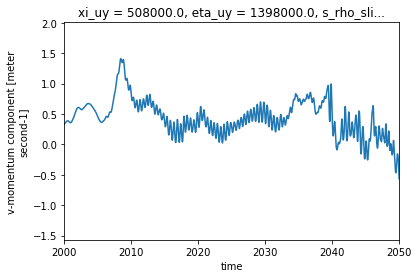

In [4]:
# chunking is not appropriate for inst
# one should be able to pass an option to CROCOrun in order to control chunks
r['inst'].u_y.isel(y_uy=350).plot(xlim=[2000,2050])

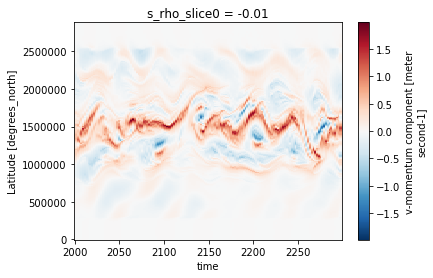

In [5]:
r['ave'].u_xy.isel(x_u=125).plot(x='time', y='eta_u')

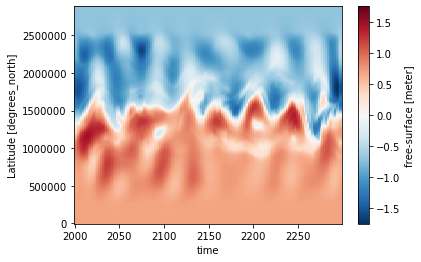

In [6]:
r['ave'].zeta.isel(x_rho=125).plot(x='time', y='eta_rho')

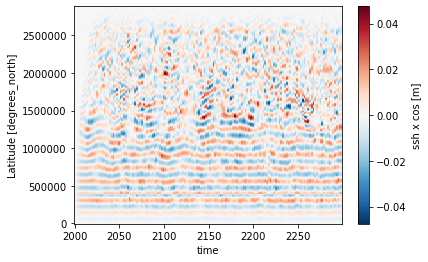

In [7]:
r['ave'].ssh_t_cos.isel(x_rho=125).plot(x='time', y='eta_rho')

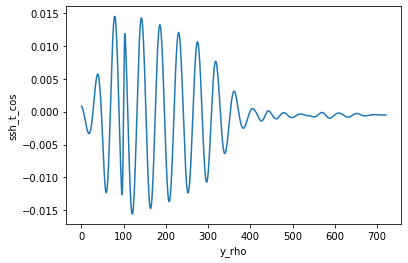

In [8]:
r['ave'].ssh_t_cos.mean(['time','x_rho']).plot()

---

## logged statistics

In [9]:
r.stats.head()

,STEP,KINETIC_ENRG,POTEN_ENRG,TOTAL_ENRG,NET_VOLUME,trd,ENSTROPHY,BTKIN_ENRG
time[DAYS],,,,,,,,
2000.00000,576000.0,0.025974,517.91395,517.93993,1.179623e+16,0.0,1.003644e-18,0.024561
2000.03472,576010.0,0.025969,517.91399,517.93996,1.179623e+16,0.0,1.003863e-18,0.024556
2000.06944,576020.0,0.025963,517.91403,517.93999,1.179623e+16,0.0,1.004065e-18,0.024552
2000.10417,576030.0,0.025958,517.91406,517.94002,1.179623e+16,0.0,1.004246e-18,0.024547
2000.13889,576040.0,0.025952,517.91410,517.94005,1.179623e+16,0.0,1.004403e-18,0.024542


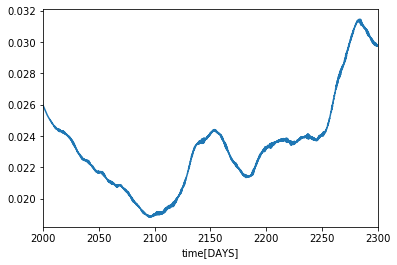

In [10]:
r.stats['KINETIC_ENRG'].plot()

In [11]:
r.params

{'dt': 300.0,
 'theta_s': 5.0,
 'theta_b': 0.0,
 'Hc': 100.0,
 'rho0': 1000.0,
 'y_itide': 400000.0,
 'jet_ywidth': 800000.0,
 'jet_weight': 0.9,
 'omega': 0.000145444104333}

---

## process multiple runs

In [12]:
runs = []
runs += ['jet_cfg1_wp5_4km_0a2000j']
runs += ['jet_cfg1_wp6_4km_0a2000j']
runs += ['jet_cfg1_wp8_4km_0a2000j']
runs += ['jet_cfg1_wp9_4km_0a2000j']
R = [pp.CROCOrun(root_path+run, prefix='file_', open_nc=['ave']) for run in runs]

/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home1/datahome/aponte/.miniconda3/envs/equinox/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


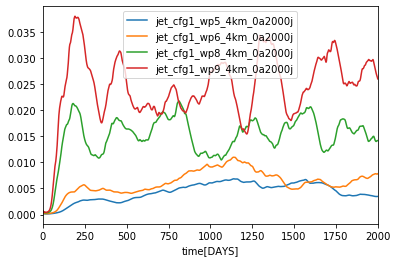

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
for r, cfg in zip(R,runs):
    r.stats['KINETIC_ENRG'].plot(ax=ax, label=cfg)
plt.legend()